In [1]:
import os
import shutil
import random
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

## UTK

El primer dataset es UTK y quiero saber cuantas imagenes tengo de cada categoría

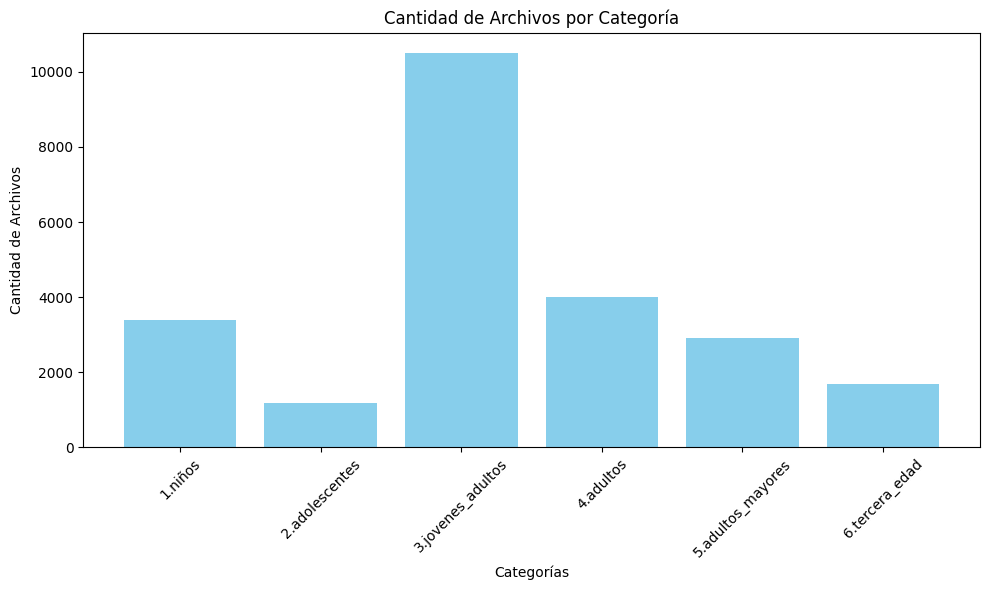

In [ ]:
# Ruta de la carpeta de imágenes
data_dir = 'images/imagenes_UTK'  

# Obtener la lista de carpetas y la cantidad de archivos en cada una
categories = os.listdir(data_dir)
file_counts = [len(os.listdir(os.path.join(data_dir, category))) for category in categories]

# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.bar(categories, file_counts, color='skyblue')
plt.xlabel('Categorías')
plt.ylabel('Cantidad de Archivos')
plt.title('Cantidad de Archivos por Categoría')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Hay 1180 imágenes de adolescentes que es la categoría más baja

Más adelante voy a tener que balancear las clases ya que vemos que hay mucha diferencia entre clases

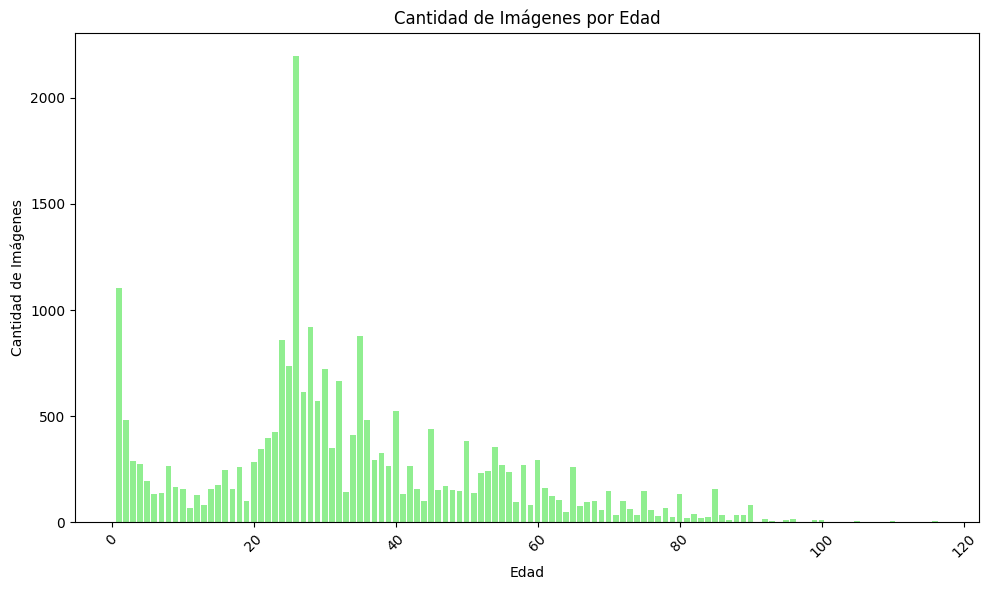

In [ ]:
# Ruta de la carpeta de imágenes
data_dir = 'images/imagenes_UTK'  # Asegúrate de que esta carpeta esté en el directorio de trabajo

# Inicializar un contador para las edades
age_counts = Counter()

# Recorrer las carpetas y contar los archivos según la edad
for category in os.listdir(data_dir):
    category_path = os.path.join(data_dir, category)
    
    for filename in os.listdir(category_path):
        # Extraer la edad del nombre del archivo
        if '_' in filename:
            age = filename.split('_')[0]  # Obtener la parte antes del primer guion bajo
            age_counts[age] += 1

# Separar las edades y sus correspondientes conteos
ages = list(age_counts.keys())
counts = list(age_counts.values())

# Convertir las edades a enteros y ordenar
ages = [int(age) for age in ages]
sorted_indices = sorted(range(len(ages)), key=lambda i: ages[i])
sorted_ages = [ages[i] for i in sorted_indices]
sorted_counts = [counts[i] for i in sorted_indices]

# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.bar(sorted_ages, sorted_counts, color='lightgreen')
plt.xlabel('Edad')
plt.ylabel('Cantidad de Imágenes')
plt.title('Cantidad de Imágenes por Edad')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Hay dos picos muy altos que quiero reducir

Y vacíos que quiero llenar, principalemte en adolescentes y tercer edad

## Facial Age

Para solucionar los problemas del dataset anterior, incluimos Facial age

Facial age está en carpetas por edades

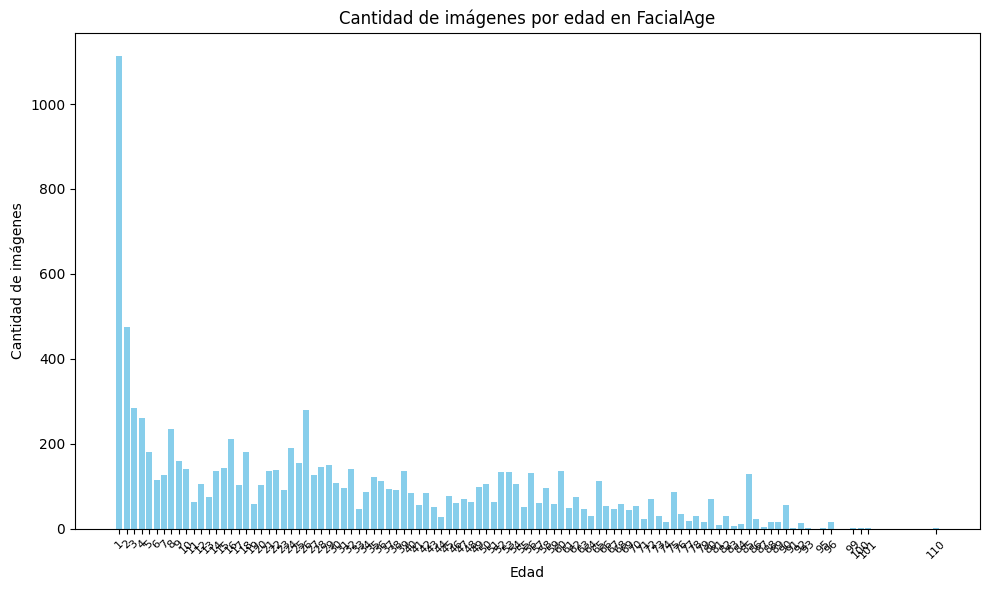

In [ ]:
# Define la ruta a la carpeta de FacialAge
facial_age_dir = "images/imagenes_FacialAge"

# Diccionario para contar la cantidad de imágenes por edad
age_count = {}

# Recorre las carpetas que representan cada edad
for folder_name in os.listdir(facial_age_dir):
    folder_path = os.path.join(facial_age_dir, folder_name)
    
    if os.path.isdir(folder_path):
        try:
            age = int(folder_name)  # Convertir el nombre de la carpeta a número (edad)
            num_images = len(os.listdir(folder_path))  # Contar la cantidad de imágenes en la carpeta
            
            age_count[age] = num_images  # Guardar la cantidad de imágenes por edad
        except ValueError:
            print(f"Carpeta {folder_name} no corresponde a una edad válida.")

# Ordenar el diccionario por edad
age_count = dict(sorted(age_count.items()))

# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.bar(age_count.keys(), age_count.values(), color='skyblue')
plt.xlabel('Edad')
plt.ylabel('Cantidad de imágenes')
plt.title('Cantidad de imágenes por edad en FacialAge')
plt.xticks(list(age_count.keys()), rotation=45, fontsize=8)  # Rotar las etiquetas del eje X para mayor claridad
plt.tight_layout()


# Mostrar el gráfico
plt.show()

Las voy a pasar a la carpeta de UTK para unificar

In [ ]:
import os
import shutil

# Define las rutas de origen y destino
facial_age_dir = "images/imagenes_FacialAge"
utk_dir = "images/imagenes_UTK"

# Define los rangos de edad y carpetas de destino
age_ranges = {
    range(0, 13): "1.niños",
    range(13, 20): "2.adolescentes",
    range(20, 36): "3.jovenes_adultos",
    range(36, 51): "4.adultos",
    range(51, 66): "5.adultos_mayores",
    range(66, 150): "6.tercera_edad"  # Usamos 150 como límite superior
}

# Función para obtener la carpeta de destino según la edad
def get_destination_folder(age):
    for age_range, folder in age_ranges.items():
        if age in age_range:
            return folder
    return None

# Recorre las carpetas de FacialAge (nombres de carpetas por edad)
for folder_name in os.listdir(facial_age_dir):
    folder_path = os.path.join(facial_age_dir, folder_name)
    
    if os.path.isdir(folder_path):
        try:
            age = int(folder_name)  # Convertir el nombre de la carpeta a un número (edad)
            destination_folder = get_destination_folder(age)
            
            if destination_folder:
                utk_folder_path = os.path.join(utk_dir, destination_folder)
                
                # Copia cada archivo a la carpeta correspondiente en UTK con el nuevo nombre
                for img_file in os.listdir(folder_path):
                    src_path = os.path.join(folder_path, img_file)
                    
                    # Generar el nuevo nombre de archivo con el formato 'edad_nombreOriginal'
                    new_img_name = f"{age}_{img_file}"
                    dest_path = os.path.join(utk_folder_path, new_img_name)
                    
                    shutil.copy(src_path, dest_path)  # Copiar la imagen con el nuevo nombre
                print(f"Copiadas imágenes de edad {age} a {destination_folder} con formato {age}_nombre")
            else:
                print(f"Edad {age} fuera de rango")
        except ValueError:
            print(f"Carpeta {folder_name} no corresponde a una edad válida.")


Copiadas imágenes de edad 1 a 1.niños con formato 1_nombre
Copiadas imágenes de edad 2 a 1.niños con formato 2_nombre
Copiadas imágenes de edad 3 a 1.niños con formato 3_nombre
Copiadas imágenes de edad 4 a 1.niños con formato 4_nombre
Copiadas imágenes de edad 5 a 1.niños con formato 5_nombre
Copiadas imágenes de edad 6 a 1.niños con formato 6_nombre
Copiadas imágenes de edad 7 a 1.niños con formato 7_nombre
Copiadas imágenes de edad 8 a 1.niños con formato 8_nombre
Copiadas imágenes de edad 9 a 1.niños con formato 9_nombre
Copiadas imágenes de edad 10 a 1.niños con formato 10_nombre
Copiadas imágenes de edad 11 a 1.niños con formato 11_nombre
Copiadas imágenes de edad 12 a 1.niños con formato 12_nombre
Copiadas imágenes de edad 13 a 2.adolescentes con formato 13_nombre
Copiadas imágenes de edad 14 a 2.adolescentes con formato 14_nombre
Copiadas imágenes de edad 15 a 2.adolescentes con formato 15_nombre
Copiadas imágenes de edad 16 a 2.adolescentes con formato 16_nombre
Copiadas imáge

## Unificados

En la carpeta UTK van a quedar todas las imagenes etiquetadas dentro de carpetas por rangos etarios y con identificador de edad

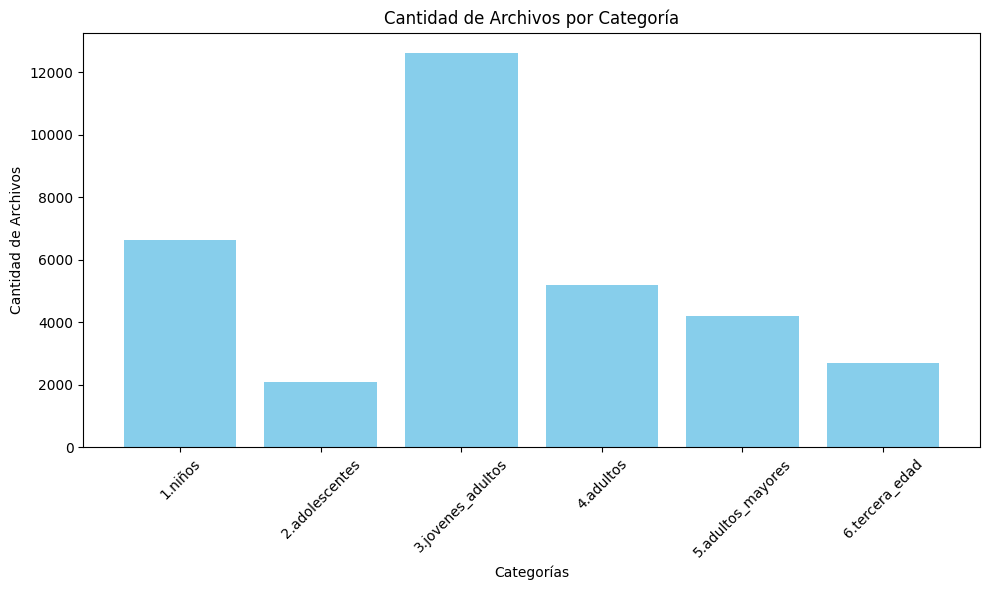

In [27]:
# Ruta de la carpeta de imágenes
data_dir = 'imagenes_UTK'  

# Obtener la lista de carpetas y la cantidad de archivos en cada una
categories = os.listdir(data_dir)
file_counts = [len(os.listdir(os.path.join(data_dir, category))) for category in categories]

# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.bar(categories, file_counts, color='skyblue')
plt.xlabel('Categorías')
plt.ylabel('Cantidad de Archivos')
plt.title('Cantidad de Archivos por Categoría')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Adolescentes que era la que mas me preocupaba subio a 2000

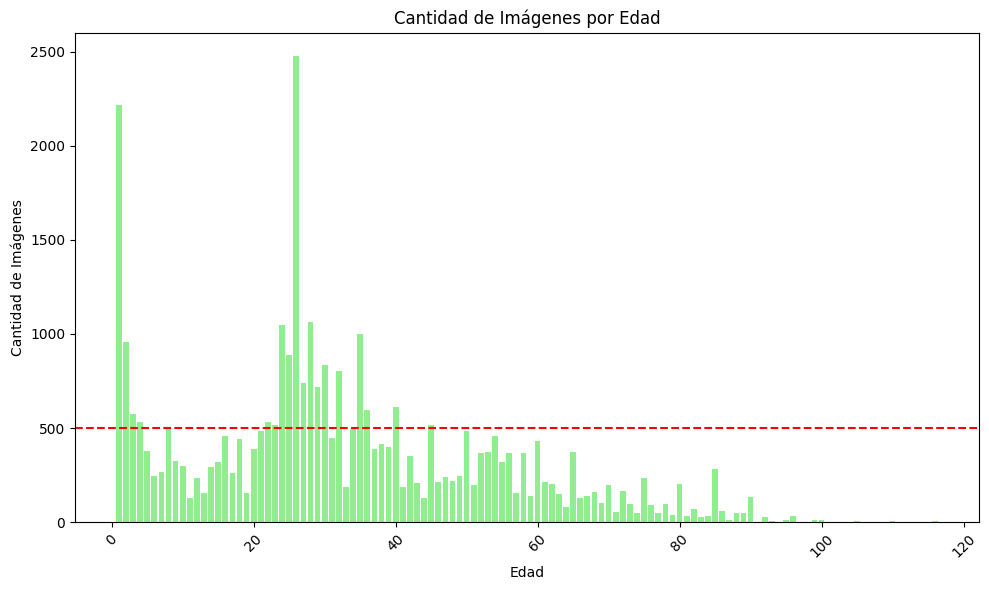

In [ ]:
# Ruta de la carpeta de imágenes
data_dir = 'images/imagenes_UTK'  # Asegúrate de que esta carpeta esté en el directorio de trabajo

# Inicializar un contador para las edades
age_counts = Counter()

# Recorrer las carpetas y contar los archivos según la edad
for category in os.listdir(data_dir):
    category_path = os.path.join(data_dir, category)
    
    for filename in os.listdir(category_path):
        # Extraer la edad del nombre del archivo
        if '_' in filename:
            age = filename.split('_')[0]  # Obtener la parte antes del primer guion bajo
            age_counts[age] += 1

# Separar las edades y sus correspondientes conteos
ages = list(age_counts.keys())
counts = list(age_counts.values())

# Convertir las edades a enteros y ordenar
ages = [int(age) for age in ages]
sorted_indices = sorted(range(len(ages)), key=lambda i: ages[i])
sorted_ages = [ages[i] for i in sorted_indices]
sorted_counts = [counts[i] for i in sorted_indices]

# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.bar(sorted_ages, sorted_counts, color='lightgreen')
plt.xlabel('Edad')
plt.ylabel('Cantidad de Imágenes')
plt.title('Cantidad de Imágenes por Edad')
plt.xticks(rotation=45)
plt.axhline(y=500, color='red', linestyle='--', label='y = 500')
plt.tight_layout()
plt.show()


Redistribuyo las imágenes en carpetas de train, validate y test

Para una muestra más equilibrada voy a poner un límite de imagenes por edad, haciendo un corte en 500 saco principalmente niños y jóvenes adultos que son los que más hay.

1) Tomar max 500 por edad
2) 70 para train 20 para validate y 10 para test
3) Guardarlas en carpetas taggeadas

In [ ]:
# Ruta de la carpeta principal que contiene las subcarpetas
base_dir = 'images/imagenes_UTK'
# Crear carpetas de destino
os.makedirs('images/train', exist_ok=True)
os.makedirs('images/validate', exist_ok=True)
os.makedirs('images/test', exist_ok=True)

# Porcentaje de división
train_ratio = 0.7
validate_ratio = 0.2
test_ratio = 0.1

# Recorremos las subcarpetas
for folder in os.listdir(base_dir):
    folder_path = os.path.join(base_dir, folder)
    
    if os.path.isdir(folder_path):
        # Crear un diccionario para almacenar imágenes por edad
        images_by_age = {}
        
        for image in os.listdir(folder_path):
            # Obtener la edad de la imagen (suponiendo que está antes de un guion bajo)
            age = image.split('_')[0]
            if age not in images_by_age:
                images_by_age[age] = []
            images_by_age[age].append(image)
        
        # Limitar a 500 imágenes por edad y dividir
        for age, images in images_by_age.items():
            # Tomar un máximo de 500 imágenes aleatorias por edad
            selected_images = random.sample(images, min(len(images), 500))
            
            # Calcular la cantidad de imágenes para cada conjunto
            total_images = len(selected_images)
            train_count = int(total_images * train_ratio)
            validate_count = int(total_images * validate_ratio)
            test_count = total_images - train_count - validate_count
            
            # Mezclar las imágenes seleccionadas
            random.shuffle(selected_images)
            
            # Distribuir las imágenes a las carpetas correspondientes
            for i, image in enumerate(selected_images):
                src = os.path.join(folder_path, image)
                if i < train_count:
                    dest_folder = 'images/train'
                elif i < train_count + validate_count:
                    dest_folder = 'images/validate'
                else:
                    dest_folder = 'images/test'
                
                dest_path = os.path.join(dest_folder, folder, image)
                os.makedirs(os.path.dirname(dest_path), exist_ok=True)
                shutil.copy(src, dest_path)

print("Distribución de imágenes completada.")


Distribución de imágenes completada.


De todas formas no están balanceadas las clases por lo que me voy a quedar con la misma cantidad para cada clase

In [ ]:
import glob

# Función para balancear las clases en una carpeta (train, validate, test)
def balance_categories(folder):
    # Crear un diccionario para almacenar cuántas imágenes tiene cada categoría
    category_counts = {}

    # Contar imágenes en cada categoría (subcarpeta)
    for category in os.listdir(folder):
        category_path = os.path.join(folder, category)
        if os.path.isdir(category_path):
            # Obtener la cantidad de imágenes en la categoría
            image_list = glob.glob(os.path.join(category_path, '*'))
            category_counts[category] = len(image_list)

    # Encontrar la categoría con menos imágenes
    min_images = min(category_counts.values())
    
    # Balancear cada categoría
    for category, count in category_counts.items():
        if count > min_images:
            category_path = os.path.join(folder, category)
            # Obtener todas las imágenes
            image_list = glob.glob(os.path.join(category_path, '*'))
            # Seleccionar aleatoriamente las imágenes para eliminar (si hay más que el mínimo)
            images_to_remove = random.sample(image_list, count - min_images)
            # Eliminar las imágenes extras
            for image_path in images_to_remove:
                os.remove(image_path)

# Balancear las categorías en cada conjunto: train, validate, test
balance_categories('images/train')
balance_categories('images/validate')
balance_categories('images/test')

print("Balanceo de clases completado.")

Balanceo de clases completado.


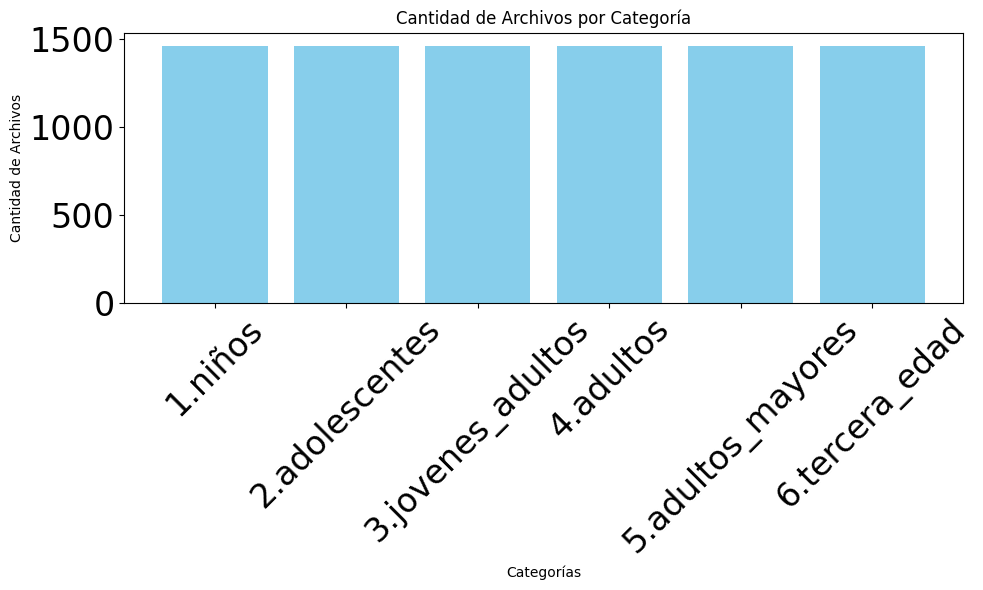

In [ ]:
# Ruta de la carpeta de imágenes
data_dir = 'images/train'  

# Obtener la lista de carpetas y la cantidad de archivos en cada una
categories = os.listdir(data_dir)
file_counts = [len(os.listdir(os.path.join(data_dir, category))) for category in categories]

# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.bar(categories, file_counts, color='skyblue')
plt.xlabel('Categorías')
plt.ylabel('Cantidad de Archivos')
plt.title('Cantidad de Archivos por Categoría')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Me quedaron aprox 1500 para train, 400 validate y 200 de test por categoría